In [1]:
import pandas as pd
import numpy as np
import ffn
import pickle
import statsmodels.api as sm
import pandas_datareader.data as web
from pandas.tseries.offsets import Day,BDay
from PerformanceStats import summarystats
import scipy
import matplotlib.pyplot as plt

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
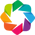

In [2]:
import matplotlib.pyplot as plt

def set_toolbar_autohide(plot, element):
    bokeh_plot = plot.state
    bokeh_plot.toolbar.autohide = True


import holoviews as hv
import hvplot.pandas
hv.extension('bokeh')

In [5]:
%matplotlib inline

In [6]:
path=r'C:\Users\GenWin7Sp1\Documents\CS\Capstone4'
region='US'
a=summarystats(region,datapath=path,outputpath=path+'//results//')

In [7]:
vix_idxs_pickle= open(path+'\\VIX_indexes.pkl',"rb")
alldata_pickle=open(path+'\\alldata_dict.pkl',"rb")
rollcosts_pickle= open(path+'\\rollcosts.pkl',"rb")
vstoxx_pickle= open(path+'\\VSTOXX_indexes.pkl',"rb")
all_idxs=pickle.load(vix_idxs_pickle)
dfdict= pickle.load(alldata_pickle)
rollcosts= pickle.load(rollcosts_pickle)
vstoxx= pickle.load(vstoxx_pickle)

In [8]:
start_dt=pd.to_datetime('1990-01-01')


if (region=='US'):
    all_idxs.rename(columns={'VIX':'Spot VIX','1M_ER':'VIX-1M ER','2M_ER':'VIX-2M ER','3M_ER':'VIX-3M ER','4M_ER':'VIX-4M ER','4M_MediumTermER':'VIX-MT ER'},inplace=True)
    vixidxs= all_idxs.copy()
    AGG = web.DataReader('AGG', 'yahoo',start=start_dt).drop(columns=['High','Low', 'Open','Close','Volume']).rename(columns={'Adj Close':'AGG'})
    GLD = web.DataReader('GLD', 'yahoo',start=start_dt).drop(columns=['High','Low', 'Open','Close','Volume']).rename(columns={'Adj Close':'GLD'})
    cash=a.getMMIndex().rename(columns={'1MTBillIndex':'Cash'})
    idxs= all_idxs.join(AGG,how='left').join(GLD,how='left').join(cash,how='left').fillna(method='ffill')
    

else:
    ## SYBA.DE: SPDR Bloomberg Barclays Euro Aggregate Bond UCITS ETF --  listed on XETRA exchange
    ## 4GLD.DE: XETRA Gold ETF
    vstoxx.rename(columns={'VSTOXX':'Spot VSTOXX','VST1ME':'VSTOXX-1M ER','VMT5ME':'VSTOXX-MT'},inplace=True)
    vixidxs= vstoxx[['STOXX','VSTOXX','VST1ME','VMT5ME']].copy()
    EAGG = web.DataReader('SYBA.DE', 'yahoo',start=start_dt).drop(columns=['High','Low', 'Open','Close','Volume']).rename(columns={'Adj Close':'EAGG'})
    EGLD=web.DataReader('4GLD.DE', 'yahoo',start=start_dt).drop(columns=['High','Low', 'Open','Close','Volume']).rename(columns={'Adj Close':'EGLD'})
    idxs= vstoxx[['STOXX','VSTOXX','VST1ME','VMT5ME']].join(EAGG,how='left').join(EGLD,how='left').fillna(method='ffill')
    idxs.rename_axis(index='date',inplace=True)
    

In [35]:
def rollstats(all_idxs, bmk):
    
    # Computing monthly percentage change, interpolating with the previous valid value in case of missing data
    mnth_end_rets= all_idxs.asfreq('M',method='ffill').pct_change()[1:]
    window=36   # 3 year window
    slopedict={}
    correldict={}

    for j in bmk:
        slope= pd.DataFrame()
        correl=pd.DataFrame()
        for i in range(window,len(mnth_end_rets)+1):
            
            # On the monthly percentage dataframe, taking a window of size 36 months,
            # but for starting data, size is less than 36 months but instead equal to number of months available
            snap=mnth_end_rets.iloc[i-window:i,:]
            
            # Then applying an OLS fit for each column with each its adjacent columns, and for each pairs the 
            # slope and correlation is computed and compiled into slopedict and correldict respectively
            #, which are returned
            X= snap.loc[:,j]
            idx=snap.index[-1] #index of last row
            for l in snap.columns[~snap.columns.str.contains(j)]:
                Y= snap.loc[:,l]
                X1= sm.add_constant(X, prepend=False)
                reg= sm.OLS(Y,X1).fit()
                slope.loc[idx,l]= reg.params[0]
                correl.loc[idx,l]= Y.corr(X)
        slopedict[j]= slope
        correldict[j]=correl
    return slopedict, correldict

In [38]:
def rollingreturns(all_idxs,windows=[36,60]):
    
    
    # For each instrument, considering only 1 value per month (interpolation is carried out using last valid in case of missing)
    # and then calculating monthly percentage change from it.
    mnth_end_rets= all_idxs.asfreq('M',method='ffill').pct_change()[1:]
    
    # Blank dataframe created with a column for each instrument to insert average 36 and 60 months values
    # for returns, risk and Returns/Risk in the final stage of this function
    df= pd.DataFrame(columns=all_idxs.columns)
    
    
    rolling=  {}
    for window in windows:
        rolling[window]={}
        
        # Blank dataframe named "rolling" created  with a column for each instruments for rolling 3 years and rolling 5 years
        for k in ['Returns','Risk','Returns/Risk']:
            rolling[window][k]= pd.DataFrame(columns=all_idxs.columns)
    
    
        # Using the monthly percentage changes computed, a rolling 36 months is calculated for return, risk and risk/return
        # for each instrument at a monthly frequency
        # same is repeated for 60 months
        for i in range(window,len(mnth_end_rets)+1):
            idx= mnth_end_rets.index[i-1]
            rolling[window]['Returns'].loc[idx,:]=scipy.stats.gmean(1+mnth_end_rets.iloc[i-window:i,:])**12-1
            rolling[window]['Risk'].loc[idx,:]= mnth_end_rets.iloc[i-window:i,:].std()*np.sqrt(12)
            rolling[window]['Returns/Risk'].loc[idx,:]= rolling[window]['Returns'].loc[idx,:]/rolling[window]['Risk'].loc[idx,:]

            
        # Taking mean of the rolling 36 months Returns, Risk and Returns/Risk computed above over the entire timespan
        # considered, giving out 3 values for each instruments.
        # Same is repeated for 60 months
        for k in ['Returns','Risk','Returns/Risk']:
            df.loc['Average '+str(window)+ 'months rolling returns',:]= np.round(100*rolling[window]['Returns'].mean(),2)
            df.loc['Average '+str(window)+ 'months rolling risk',:]= np.round(rolling[window]['Risk'].mean()*100,2)
            df.loc['Average '+str(window)+ 'months rolling return/risk',:]= np.round(rolling[window]['Returns/Risk'].mean().astype(float),2)
        
    return df,rolling

In [53]:
def dictcreater(ac,region):
# This function is designed to automatically generate and return an array (text format) that specifies
# a set of allocation ratio of a pair of 2 assets, with the first asset being always 'SPY'
# in the case of 'US' region, otherwise 'STOXX' (this is specified by the argument "region")

# the argument ac is an array (text format) of the assets to be considered for diversification
# e.g. 'AGG', 'GLD' and 'VIX-MT ER'

# the 4 allocation ratio generated are 90%:10%, 80%:20%, 70%:30% and 60%:40%
# with each element of the array being in the form 'SPY 90%/ Cash 10%': {'SPY': 0.9, 'Cash': 0.1}'
    
    
    hedgedict={}
    if (region=='US'): bm='SPY'
    else: bm= 'STOXX'
    for i in ac:
        for k in np.round(np.arange(0.1,0.45,0.1),1):
            keys= '{} {:.0%}/ {} {:.0%}'.format(bm,1-k,i,k)
            hedgedict[keys]= dict({bm:1-k,i:k})
    return hedgedict

In [120]:
def monthly_rebalancer(wtdict,idxs):
    # Reconstituted df containing only the assets of the portfolio
    recon_idxs=idxs[list(wtdict.keys())]
    # Re-reading the index df
    dts= pd.DataFrame(data=recon_idxs.index)

    
    # the df alldts is constructed dts
    dts['month']= pd.DatetimeIndex(dts.date).month
    dts['year']= pd.DatetimeIndex(dts.date).year
    alldts=dts.groupby(['year','month'])['date'].min().reset_index()
    alldts.drop(columns=['month','year'],inplace=True)
    
    
    
    # Adding in columns for the weights and assigning the monthly targeted weights accordingly
    for keys,values in wtdict.items():
        alldts[keys+'_wt']= values

    # Deleting first rwo
    alldts.drop(index=0,inplace=True)

    
    # Merging alldts(containing targeted monthly weights) with recon_idxs (containing daily price of the portfolio instruments)
    # Resulting df : idxtemp
    idxtemp=pd.merge(recon_idxs,alldts.set_index('date'),left_index=True,right_index=True,how='left')

    
    # For each portfolio
    for keys,values in wtdict.items():
        # Adding new columns for each instruments in the portfolio, naming them with their name + '_open'
        # and filling them with preceding day prices
        idxtemp[keys+'_open']= idxtemp[keys].shift(1)
        # for ease of analysis, we are considering that we initially have $1 in each portfolio
        # applying respective weights on this $1 for each instruments in the portfolio
        # and computing the equivalent corresponding number of shares
        idxtemp[keys+'_shares']= idxtemp[keys+'_wt']/idxtemp[keys+'_open']

    # Filling missing data for '_shares' with last available data
    idxtemp.loc[:,idxtemp.columns.str.contains('shares')]=idxtemp.loc[:,idxtemp.columns.str.contains('shares')].fillna(method='ffill')
    # and deleting the starting rows with missing data as these have no earlier and valid data for interpolation   
    idxtemp.dropna(subset=[keys+'_shares' for keys in wtdict.keys()],inplace=True)

    # For each portfolio
    for keys,values in wtdict.items():
        # Multiplying the number of shares needed to attain balancing target with price
        idxtemp[keys+'_cumretfactor']= idxtemp[keys+'_shares']*idxtemp[keys]
        # Taking 1 day lag of above
        idxtemp[keys+'_lagcumretfactor']=idxtemp[keys+'_shares']*idxtemp[keys+'_open']


    # Computing the daily return of portfolio value
    idxtemp['1Dret']= idxtemp.loc[:,idxtemp.columns.str.contains('_cumretfactor')].sum(axis=1)/(idxtemp.loc[:,idxtemp.columns.str.contains('_lagcumretfactor')].sum(axis=1))-1
    
    
    
    portpx= pd.DataFrame()
    # Taking the cumulative product of the daily return to obtain the portfolio daily value
    portpx['idxlevel']= (1+idxtemp['1Dret']).cumprod()
    # Reinstating initial portfolio value to 1, and adjusting for business days
    portpx.loc[idxtemp.index[0]- BDay(),'idxlevel']=1
    portpx.sort_index(inplace=True)
    portpx= portpx.astype(float)
    
    return portpx['idxlevel']

In [121]:
slopedict= {}
correldict={}
if(region=='US'):
    bmk= ['SPY','Spot VIX']
else:
    bmk= ['STOXX','Spot VSTOXX']
slopedict, correldict =rollstats(vixidxs,bmk)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [122]:
slopedict[bmk[0]].hvplot.line(title='36 mnth rolling Beta with spot {}'.format(bmk[0]),width=1000, height=500).opts(hooks=[set_toolbar_autohide], backend='bokeh',legend_position='bottom_right',fontsize={'legend':7})

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [123]:
if(region=='US'):
    p=slopedict['Spot VIX'][slopedict['Spot VIX'].columns[slopedict['Spot VIX'].columns.str.contains('ER')]]
    rollingrollcosts= rollcosts.rolling(window=720).mean()
    b=rollingrollcosts.asfreq('M',method='ffill').reindex(index=slopedict['Spot VIX'].index)
    df= pd.DataFrame(index=p.index)
    df['VIX-1M']= p['VIX-1M ER']/b['rollcost_1M']
    df['VIX-2M']= p['VIX-2M ER']/b['rollcost_2M']
    df['VIX-3M']= p['VIX-3M ER']/b['rollcost_3M']
    df['VIX-4M']= p['VIX-4M ER']/b['rollcost_4M']
    df['VIX-MT']= p['VIX-MT ER']/b['rollcost_4MMT']
    print(df.mean())

VIX-1M    0.025740
VIX-2M    0.028813
VIX-3M    0.037801
VIX-4M    0.040480
VIX-MT    0.049651
dtype: float64


In [124]:
# df[df.index>pd.to_datetime('2012-01-01')].hvplot.line(title='36 mnth rolling beta to spot VIX/rollcosts',width=1000, height=500)

In [125]:
correldict[bmk[0]].hvplot.line(title='36 mnth rolling correlation with spot {}'.format(bmk[0]),width=1000, height=500)\
.opts(hooks=[set_toolbar_autohide], backend='bokeh',legend_position='bottom',fontsize={'legend':7})

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [126]:
ffn.core.to_drawdown_series(idxs).hvplot.line(y=list(idxs.columns),title='Max Drawdown',width=1000, height=500)\
.opts(hooks=[set_toolbar_autohide], backend='bokeh',legend_position='bottom',fontsize={'legend':7})

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [127]:
if(region=='US'):
    dict2A= dictcreater(['Cash','AGG','GLD','VIX-MT ER'],region=region)
    dict3A={'SPY 60%/AGG 40%':{'SPY':0.6,'AGG':0.4},'SPY 60%/AGG 35%/GLD 5%':{'SPY':0.6,'AGG':0.35,'GLD':0.05},\
            'SPY 60%/AGG 30%/GLD 10%':{'SPY':0.6,'AGG':0.3,'GLD':0.1},'SPY 60%/AGG 20%/GLD 20%':{'SPY':0.6,'AGG':0.2,'GLD':0.2},\
        'SPY 60%/AGG 30%/VIX-MT 10%':{'SPY':0.6,'AGG':0.3,'VIX-MT ER':0.1},'SPY 60%/AGG 20%/VIX-MT 20%':{'SPY':0.6,'AGG':0.2,'VIX-MT ER':0.2}}
else:
    dict2A= dictcreater(['EAGG','EGLD','VMT5ME'],region=region)
    dict3A={'STOXX 50 60%/EUR AGG 40%':{'STOXX':0.6,'EAGG':0.4},\
            'STOXX 50 60%/ EUR AGG 35%/XETRA GOLD ETF 5%':{'STOXX':0.6,'EAGG':0.35,'EGLD':0.05},\
            'STOXX 50 60%/EUR AGG 30%/XETRA GOLD ETF 10%':{'STOXX':0.6,'EAGG':0.3,'EGLD':0.1},\
            'STOXX 50 60%/ EUR AGG 20%/XETRA GOLD ETF 20%':{'STOXX':0.6,'EAGG':0.2,'EGLD':0.2},\
            'STOXX 60%/EUR AGG 30%/VSTOXX-MT 10%':{'STOXX':0.6,'EAGG':0.3,'VSTOXX-MT ER':0.1},\
        'STOXX 60%/EUR AGG 20%/VSTOXX-MT 20%':{'STOXX':0.6,'EAGG':0.2,'VSTOXX-MT ER':0.2}}
    
portdict2A={}
portdict3A={}
        
for port in dict2A.keys():
        portdict2A[port]=pd.Series(monthly_rebalancer(dict2A[port],idxs),name=port)
        
for port in dict3A.keys():
        portdict3A[port]=pd.Series(monthly_rebalancer(dict3A[port],idxs),name=port)

portpx2A=pd.concat([portdict2A[i] for i in portdict2A.keys()],axis=1)
portpx3A=pd.concat([portdict3A[i] for i in portdict3A.keys()],axis=1)

In [128]:
a.PerformanceSummaryWrapper(idxs[bmk[0]].to_frame().join(portpx3A,how='inner'),simulationname='3asset')

C:\ProgramData\Anaconda3\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\ProgramData\Anaconda3\lib\site-packages\ffn\core.py:1388: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  res = orig.ix[dts.values]


SPY SPY 60%/AGG 40%  \
start                                2008-05-30      2008-05-30   
end                                  2020-10-12      2020-10-12   
Annualized Compunded Return/CAGR(%)        9.98               8   
Annualized Arthimetic mean(%)             10.78            8.16   
Risk (%)                                  15.83             9.7   
Downside Risk (%)                         12.22             7.5   
Return/Risk                                0.63            0.82   
Skewness                                  -0.73           -0.82   
Kurtosis                                   1.46             2.1   
Sharpe-Ratio                                0.6            0.77   
Sortino-Ratio                              0.82            1.07   
Maximum Drawdown (%)                      -50.7          -33.19   
Calmar Ratio                                0.2            0.24   
Return/Max Drawdown                         0.2            0.24   

                                    SPY 60%/AGG 35%/GLD 5%  \
start                                           2008-05-30   
end                                             2020-10-12   
Annualized Compunded Return/CAGR(%)                   8.16   
Annualized Arthimetic mean(%)                         8.32   
Risk (%)                                              9.84   
Downside Risk (%)                                     7.54   
Return/Risk                                           0.83   
Skewness                                             -0.79   
Kurtosis                                              2.36   
Sharpe-Ratio                                          0.78   
Sortino-Ratio                                         1.08   
Maximum Drawdown (%)                                -33.05   
Calmar Ratio                                          0.25   
Return/Max Drawdown                                   0.25   

                                    SPY 60%/AGG 30%/GLD 10%  \
start                                            2008-05-30   
end                                              2020-10-12   
Annualized Compunded Return/CAGR(%)                    8.31   
Annualized Arthimetic mean(%)                          8.48   
Risk (%)                                              10.03   
Downside Risk (%)                                      7.62   
Return/Risk                                            0.83   
Skewness                                              -0.76   
Kurtosis                                                2.6   
Sharpe-Ratio                                           0.78   
Sortino-Ratio                                          1.09   
Maximum Drawdown (%)                                 -32.91   
Calmar Ratio                                           0.25   
Return/Max Drawdown                                    0.25   

                                    SPY 60%/AGG 20%/GLD 20%  \
start                                            2008-05-30   
end                                              2020-10-12   
Annualized Compunded Return/CAGR(%)                    8.58   
Annualized Arthimetic mean(%)                           8.8   
Risk (%)                                              10.61   
Downside Risk (%)                                      7.92   
Return/Risk                                            0.81   
Skewness                                              -0.69   
Kurtosis                                               2.98   
Sharpe-Ratio                                           0.76   
Sortino-Ratio                                          1.08   
Maximum Drawdown (%)                                 -32.72   
Calmar Ratio                                           0.26   
Return/Max Drawdown                                    0.26   

                                    SPY 60%/AGG 30%/VIX-MT 10%  \
start                                               2008-05-30   
end                                                 2020-10-12   
Annualized Compun

In [129]:
a.PerformanceSummaryWrapper(idxs[bmk[0]].to_frame().join(portpx2A,how='inner'),simulationname='2asset')

SPY SPY 90%/ Cash 10%  \
start                                2008-05-30        2008-05-30   
end                                  2020-10-12        2020-10-12   
Annualized Compunded Return/CAGR(%)        9.98              9.13   
Annualized Arthimetic mean(%)             10.78              9.75   
Risk (%)                                  15.83             14.25   
Downside Risk (%)                         12.22                11   
Return/Risk                                0.63              0.64   
Skewness                                  -0.73             -0.73   
Kurtosis                                   1.46              1.46   
Sharpe-Ratio                                0.6               0.6   
Sortino-Ratio                              0.82              0.83   
Maximum Drawdown (%)                      -50.7            -46.85   
Calmar Ratio                                0.2              0.19   
Return/Max Drawdown                         0.2              0.19   

                                    SPY 80%/ Cash 20% SPY 70%/ Cash 30%  \
start                                      2008-05-30        2008-05-30   
end                                        2020-10-12        2020-10-12   
Annualized Compunded Return/CAGR(%)              8.25              7.35   
Annualized Arthimetic mean(%)                    8.73               7.7   
Risk (%)                                        12.66             11.08   
Downside Risk (%)                                9.78              8.55   
Return/Risk                                      0.65              0.66   
Skewness                                        -0.73             -0.73   
Kurtosis                                         1.46              1.46   
Sharpe-Ratio                                     0.61              0.62   
Sortino-Ratio                                    0.84              0.86   
Maximum Drawdown (%)                           -42.76             -38.4   
Calmar Ratio                                     0.19              0.19   
Return/Max Drawdown                              0.19              0.19   

                                    SPY 60%/ Cash 40% SPY 90%/ AGG 10%  \
start                                      2008-05-30       2008-05-30   
end                                        2020-10-12       2020-10-12   
Annualized Compunded Return/CAGR(%)              6.43             9.53   
Annualized Arthimetic mean(%)                    6.68            10.13   
Risk (%)                                         9.49            14.28   
Downside Risk (%)                                7.33            11.03   
Return/Risk                                      0.68             0.67   
Skewness                                        -0.73            -0.75   
Kurtosis                                         1.46             1.57   
Sharpe-Ratio                                     0.62             0.63   
Sortino-Ratio                                    0.88             0.86   
Maximum Drawdown (%)                           -33.78           -46.74   
Calmar Ratio                                     0.19              0.2   
Return/Max Drawdown                              0.19              0.2   

                                    SPY 80%/ AGG 20% SPY 70%/ AGG 30%  \
start                                     2008-05-30       2008-05-30   
end                                       2020-10-12       2020-10-12   
Annualized Compunded Return/CAGR(%)             9.04             8.54   
Annualized Arthimetic mean(%)                   9.47             8.82   
Risk (%)                                       12.73            11.21   
Downside Risk (%)                               9.84             8.67   
Return/Risk                                     0.71             0.76   
Skewness                                       -0.77            -0.79   
Kurtosis                                        1.71             1.88   
Sharpe-Ratio                             

In [130]:
a.PerformanceSummaryWrapper(idxs[['Spot VIX','VIX-1M ER', 'VIX-2M ER', 'VIX-3M ER', 'VIX-4M ER','VIX-MT ER']],simulationname='VIXidxs')

Spot VIX   VIX-1M ER   VIX-2M ER  \
start                                2008-05-20  2008-05-20  2008-05-20   
end                                  2020-10-12  2020-10-12  2020-10-12   
Annualized Compunded Return/CAGR(%)         2.9      -44.76      -28.82   
Annualized Arthimetic mean(%)             36.51      -33.84      -19.39   
Risk (%)                                   91.1       76.75       58.47   
Downside Risk (%)                         50.57       37.27       28.98   
Return/Risk                                0.03       -0.58       -0.49   
Skewness                                   1.81        2.58        2.88   
Kurtosis                                   5.73        9.57       13.72   
Sharpe-Ratio                               0.03       -0.59        -0.5   
Sortino-Ratio                              0.06        -1.2       -0.99   
Maximum Drawdown (%)                      -88.7      -99.99      -99.78   
Calmar Ratio                               0.03       -0.45       -0.29   
Return/Max Drawdown                        0.03       -0.45       -0.29   

                                      VIX-3M ER   VIX-4M ER   VIX-MT ER  
start                                2008-05-20  2008-05-20  2008-05-20  
end                                  2020-10-12  2020-10-12  2020-10-12  
Annualized Compunded Return/CAGR(%)      -19.34      -16.18      -13.92  
Annualized Arthimetic mean(%)            -11.53      -10.18       -9.02  
Risk (%)                                  48.28       41.68       36.82  
Downside Risk (%)                          24.4       21.58       19.57  
Return/Risk                                -0.4       -0.39       -0.38  
Skewness                                   2.86        2.73        2.49  
Kurtosis                                   14.3       13.68        11.7  
Sharpe-Ratio                              -0.41        -0.4       -0.39  
Sortino-Ratio                             -0.79       -0.75       -0.71  
Maximum Drawdown (%)                     -98.82      -97.79      -96.44  
Calmar Ratio                               -0.2       -0.17       -0.14  
Return/Max Drawdown                        -0.2       -0.17       -0.14

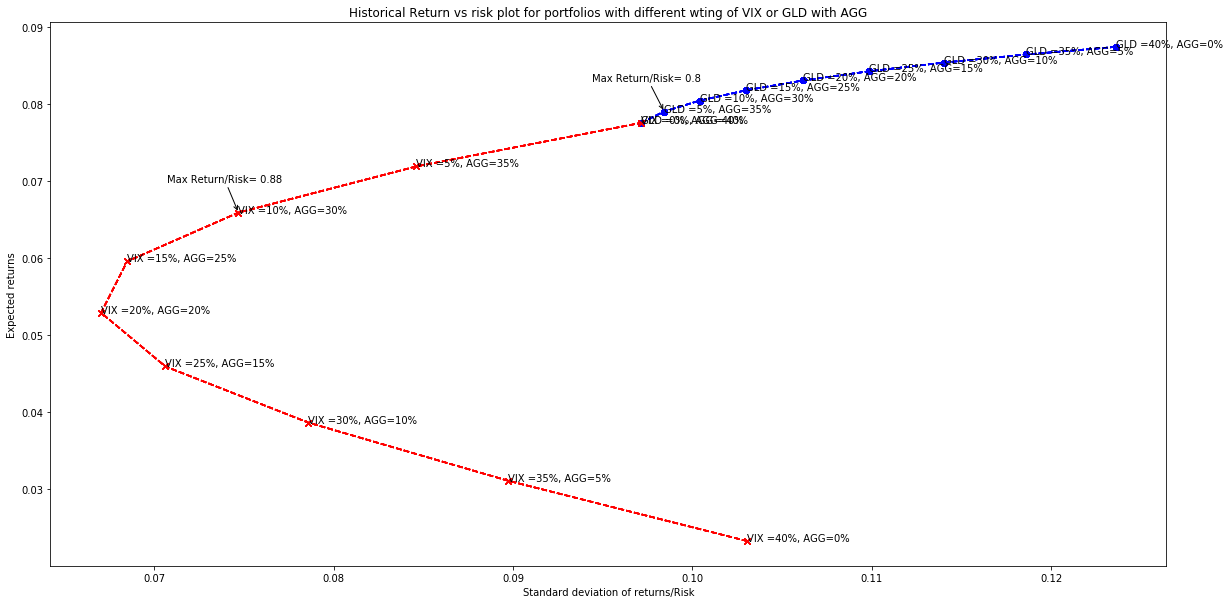

In [131]:
allocstats={}

if (region=='US'):
    bmk2= ['SPY','AGG','GLD','VIX-1M ER','VIX-MT ER','Cash']
else:
    bmk2= ['STOXX','EAGG','EGLD','VSTOXX-1M ER','VSTOXX-MT ER','Cash']
    
for k in [bmk2[2],bmk2[4]]:
    allocstats[k]=pd.DataFrame()
    allocstats[k][bmk2[1]]= np.arange(0,0.41,0.05)
    allocstats[k][bmk2[0]]= 0.6 ##np.arange(0.6,0.91,0.1)    
    allocstats[k][k]= 1-allocstats[k][bmk2[0]]-allocstats[k][bmk2[1]]
#     -allocstats[k][bmk2[1]]
    for idx in allocstats[k].index:    
        strategyreturns=pd.Series(monthly_rebalancer(allocstats[k].loc[idx,allocstats[k].columns[~allocstats[k].columns.str.contains('Return|Risk')]].to_dict(),idxs))
        allocstats[k].loc[idx,'Return(%)']=(scipy.stats.gmean(1+ffn.core.to_monthly(strategyreturns).to_returns()[1:])**12-1)
        allocstats[k].loc[idx,'Risk(%)']= (ffn.core.to_monthly(strategyreturns).to_returns()[1:]).std()*np.sqrt(12)

    snap=allocstats[k][allocstats[k]['Return(%)']/allocstats[k]['Risk(%)']==np.max(allocstats[k]['Return(%)']/allocstats[k]['Risk(%)'])]
    

    for i in allocstats[k].index:
        
#         plt.annotate("{}={:.0%}".format(k,allocstats[k].loc[i,k]),xy=(allocstats[k].loc[i,'Risk(%)'],allocstats[k].loc[i,'Return(%)']),\
#                     xytext=(allocstats[k].loc[i,'Risk(%)']+0.001,allocstats[k].loc[i,'Return(%)']+.001))
        
        if (k==bmk2[4]):
            plt.annotate("VIX ={:.0%}, AGG={:.0%}".format(allocstats[k].loc[i,k],allocstats[k].loc[i,bmk2[1]]),xy=(allocstats[k].loc[i,'Risk(%)'],allocstats[k].loc[i,'Return(%)']))
            plt.plot(allocstats[k]['Risk(%)'],allocstats[k]['Return(%)'] ,color='red', marker='x', linestyle='dashed')
        
        if(k==bmk2[2]):
            plt.annotate("GLD ={:.0%}, AGG={:.0%}".format(allocstats[k].loc[i,k],allocstats[k].loc[i,bmk2[1]]),xy=(allocstats[k].loc[i,'Risk(%)'],allocstats[k].loc[i,'Return(%)']))
            plt.plot(allocstats[k]['Risk(%)'],allocstats[k]['Return(%)'] ,color='blue', marker='o', linestyle='dashed')
#         else:
#             plt.plot(allocstats[k]['Risk(%)'],allocstats[k]['Return(%)'] ,color='black', marker='+', linestyle='dashed')
    
    maxsr= snap['Return(%)']/snap['Risk(%)']
    plt.annotate('Max Return/Risk= {}'.format(np.round(maxsr.values[0],2)), xy=(snap['Risk(%)'],snap['Return(%)']),xytext=(snap['Risk(%)']-0.004,snap['Return(%)']+.004), arrowprops=dict(arrowstyle='->'))
        

plt.rcParams['figure.figsize']=[20,10]
plt.xlabel('Standard deviation of returns/Risk')
plt.ylabel('Expected returns')
plt.title('Historical Return vs risk plot for portfolios with different wting of VIX or GLD with AGG')
# plt.title('Historical Return vs risk plot for portfolios with different wting of {},{},{} with {} '.format(bmk2[4],bmk2[2],bmk2[1],bmk2[0]))
plt.show()

In [132]:
dfroll,b=rollingreturns(idxs)

In [133]:
b[36]['Returns/Risk'].hvplot.hist(y='VIX-1M ER')* hv.VLine(b[36]['Returns/Risk']['VIX-1M ER'].mean()).opts(color='black',alpha= 0.3)

:Overlay
   .Histogram.I :Histogram   [VIX-1M ER]   (VIX-1M ER_count)
   .VLine.I     :VLine   [x,y]

In [134]:
allocstats

{'GLD':     AGG  SPY   GLD  Return(%)   Risk(%)
 0  0.00  0.6  0.40   0.087380  0.123588
 1  0.05  0.6  0.35   0.086400  0.118616
 2  0.10  0.6  0.30   0.085347  0.114021
 3  0.15  0.6  0.25   0.084221  0.109851
 4  0.20  0.6  0.20   0.083024  0.106156
 5  0.25  0.6  0.15   0.081754  0.102987
 6  0.30  0.6  0.10   0.080412  0.100394
 7  0.35  0.6  0.05   0.078999  0.098423
 8  0.40  0.6  0.00   0.077515  0.097111,
 'VIX-MT ER':     AGG  SPY  VIX-MT ER  Return(%)   Risk(%)
 0  0.00  0.6       0.40   0.023288  0.103055
 1  0.05  0.6       0.35   0.031111  0.089727
 2  0.10  0.6       0.30   0.038664  0.078570
 3  0.15  0.6       0.25   0.045932  0.070620
 4  0.20  0.6       0.20   0.052902  0.067027
 5  0.25  0.6       0.15   0.059561  0.068481
 6  0.30  0.6       0.10   0.065893  0.074688
 7  0.35  0.6       0.05   0.071883  0.084609
 8  0.40  0.6       0.00   0.077515  0.097111}

In [34]:
a.values[0]

idxtemp[27:]